In [8]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn import cluster
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz

In [9]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [10]:
train = '/content/gdrive/My Drive/Datasets/train.csv'

# KNN2

In [11]:
data = pd.read_csv(train)
data.shape
# Import and subset starter features
starterFeatures = data[['rsi14','sma9_var', 'sma180_var', 'vwap_var']]
rsi14 = data[['rsi14']]
sma9_var = data[['sma9_var']]
sma180_var = data[['sma180_var']]
vwap_var = data[['vwap_var']]
y = data[['is_profit']]
starterFeatures.values # Now np array

array([[ 3.05097608e+01, -6.22295056e-03, -2.26789532e-02,
        -1.75263798e-02],
       [ 4.64527415e+01, -1.06159541e-03, -4.72095039e-03,
        -7.71311385e-03],
       [ 3.43362238e+01, -4.44335091e-03, -1.66481693e-02,
        -1.65887992e-02],
       ...,
       [ 4.15506365e+01, -1.99079526e-03, -1.47744623e-02,
        -3.80272760e-03],
       [ 3.54330613e+01, -5.42660160e-03, -1.26001612e-02,
        -1.57668748e-02],
       [ 3.76485639e+01, -4.00720367e-03, -1.61337123e-02,
        -1.65276248e-02]])

In [12]:
# Import LabelEncoder
from sklearn import preprocessing
#creating labelEncoder
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
rsi14_encoded=le.fit_transform(rsi14)
sma9_var_en = le.fit_transform(sma9_var)
sma180_var_en = le.fit_transform(sma180_var)
vwap_var_en = le.fit_transform(vwap_var)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [16]:
y_en = le.fit_transform(y)
features=list(zip(rsi14_encoded, sma9_var_en, sma180_var_en, vwap_var_en))
label = ["rsi14_encoded", "sma9_var_en", "sma180_var_en", "vwap_var_en"]

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [17]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)

# Train the model using the training sets
model.fit(features,label)

ValueError: ignored

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(starterFeatures, y, test_size=0.3, random_state=17)

In [ ]:
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=30)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy score: {}'.format(accuracy_score(y_test, y_pred)))
print('Precision score: {}'.format(precision_score(y_test, y_pred)))
print('Recall score: {}'.format(recall_score(y_test, y_pred)))
print('F1 score: {}'.format(f1_score(y_test, y_pred)))

# Decision Tree2

In [18]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [19]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/gdrive')
train = "/content/gdrive/My Drive/Datasets/train.csv"
data = pd.read_csv(train)
data.shape

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


(258729, 23)

In [20]:
# Import and subset starter features
starterFeatures = data[['rsi14','sma9_var', 'sma180_var', 'vwap_var']]
y = data[['is_profit']]
starterFeatures.values # Now np array

array([[ 3.05097608e+01, -6.22295056e-03, -2.26789532e-02,
        -1.75263798e-02],
       [ 4.64527415e+01, -1.06159541e-03, -4.72095039e-03,
        -7.71311385e-03],
       [ 3.43362238e+01, -4.44335091e-03, -1.66481693e-02,
        -1.65887992e-02],
       ...,
       [ 4.15506365e+01, -1.99079526e-03, -1.47744623e-02,
        -3.80272760e-03],
       [ 3.54330613e+01, -5.42660160e-03, -1.26001612e-02,
        -1.57668748e-02],
       [ 3.76485639e+01, -4.00720367e-03, -1.61337123e-02,
        -1.65276248e-02]])

In [21]:
X_train, X_test, y_train, y_test = train_test_split(starterFeatures, y, test_size=0.3, random_state=17)

In [22]:
from sklearn.preprocessing import StandardScaler  
sc = StandardScaler()  
X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test) 

In [23]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
predictions = clf.predict(X_test)

In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy score: {}'.format(accuracy_score(y_test, predictions)))
print('Precision score: {}'.format(precision_score(y_test, predictions)))
print('Recall score: {}'.format(recall_score(y_test, predictions)))
print('F1 score: {}'.format(f1_score(y_test, predictions)))

Accuracy score: 0.6803231167626483
Precision score: 0.6097499874743224
Recall score: 0.41686647941357813
F1 score: 0.49518849307265067


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


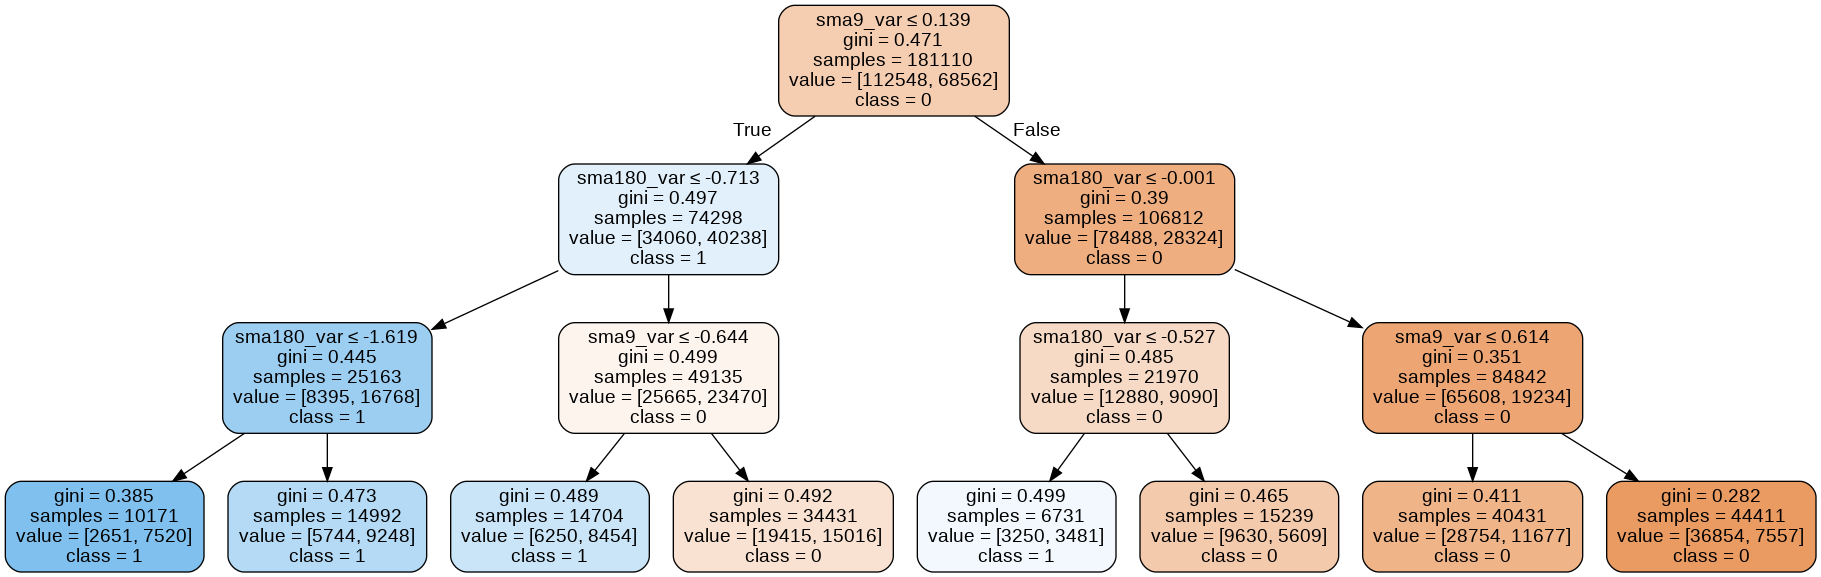

In [25]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = ['rsi14','sma9_var', 'sma180_var', 'vwap_var'],class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('DT.png')
Image(graph.create_png())

# Decision Tree

In [26]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [27]:
train = "/content/gdrive/My Drive/Datasets/train.csv"
data = pd.read_csv(train)
data.shape

(258729, 23)

In [28]:
# Import and subset starter features
starterFeatures = data[['rsi14','sma9_var', 'sma180_var', 'vwap_var', 'spread14_e', 'volume14_34_var']]
starterFeatures.values # Now np array

array([[ 3.05097608e+01, -6.22295056e-03, -2.26789532e-02,
        -1.75263798e-02,  6.20277431e-04, -6.47219439e-03],
       [ 4.64527415e+01, -1.06159541e-03, -4.72095039e-03,
        -7.71311385e-03,  6.94550431e-04,  2.80249052e-01],
       [ 3.43362238e+01, -4.44335091e-03, -1.66481693e-02,
        -1.65887992e-02,  5.17536955e-04,  2.84800337e-01],
       ...,
       [ 4.15506365e+01, -1.99079526e-03, -1.47744623e-02,
        -3.80272760e-03,  9.92928505e-04, -6.25099506e-02],
       [ 3.54330613e+01, -5.42660160e-03, -1.26001612e-02,
        -1.57668748e-02,  1.91786870e-03,  4.61433244e-02],
       [ 3.76485639e+01, -4.00720367e-03, -1.61337123e-02,
        -1.65276248e-02,  2.37414138e-03, -3.91132813e-05]])

In [29]:
subset_rsi14 = data[['is_profit','rsi14']]
subset_rsi14 = subset_rsi14.iloc[0:150000]
subset_rsi14.sort_values(by=['rsi14'])

,is_profit,rsi14
10255,True,6.140843
71157,False,8.821487
135272,True,9.132699
58913,True,9.872453
10123,True,10.172752
...,...,...
101321,False,64.752150
17884,False,64.824593
65197,False,67.462330
26950,False,68.149161


In [30]:
rsi14_test1 = data.iloc[150000:180000, 3]
rsi14_test1_labels = data.iloc[150000:180000, 0]

In [31]:
# Normalize starter features
# min_max_scaler = preprocessing.MinMaxScaler()
# startersScaled = min_max_scaler.fit_transform(starterFeatures)
# subset = pd.DataFrame(startersScaled, columns=['rsi14','sma9_var', 'sma180_var', 'vwap_var', 'spread14_e', 'volume14_34_var'])
# subset.shape
subset = starterFeatures

In [32]:
training = subset.iloc[0:150000]
training_labels = data.iloc[0:150000, 0]

test1 = subset.iloc[150000:180000]
test1_labels = data.iloc[150000:180000, 0]

test2 = subset.iloc[180000:210000]
test2_labels = data.iloc[180000:210000, 0]

test3 = subset.iloc[210000:258729]
test3_labels = data.iloc[210000:258729, 0]
test3.shape

(48729, 6)

In [33]:
def tree_graph_to_png(tree, feature_names, png_file_to_save):
    tree_str = export_graphviz(tree, feature_names=feature_names, 
                                     filled=True, out_file=None)
    graph = pydotplus.graph_from_dot_data(tree_str)  
    graph.write_png(png_file_to_save)

rsi14_tree = DecisionTreeClassifier(max_depth= 10,random_state=17)
rsi14_tree.fit(subset_rsi14['rsi14'].values.reshape(-1, 1), subset_rsi14['is_profit'].values)

tree_graph_to_png(rsi14_tree, feature_names=['rsi14'], 
                 png_file_to_save='rsi14_tree.png')

from IPython.display import Image
from IPython.core.display import HTML 
PATH = "rsi14_tree.png"
Image(filename = PATH , width=500, height=200)

Output hidden; open in https://colab.research.google.com to view.

In [34]:
#clf_tree = DecisionTreeClassifier(criterion='entropy',max_depth= 1, random_state=17)
clf = DecisionTreeClassifier(criterion='gini', max_depth=6, random_state=17)
clf = clf.fit(training, training_labels)
#tree.plot_tree(clf)

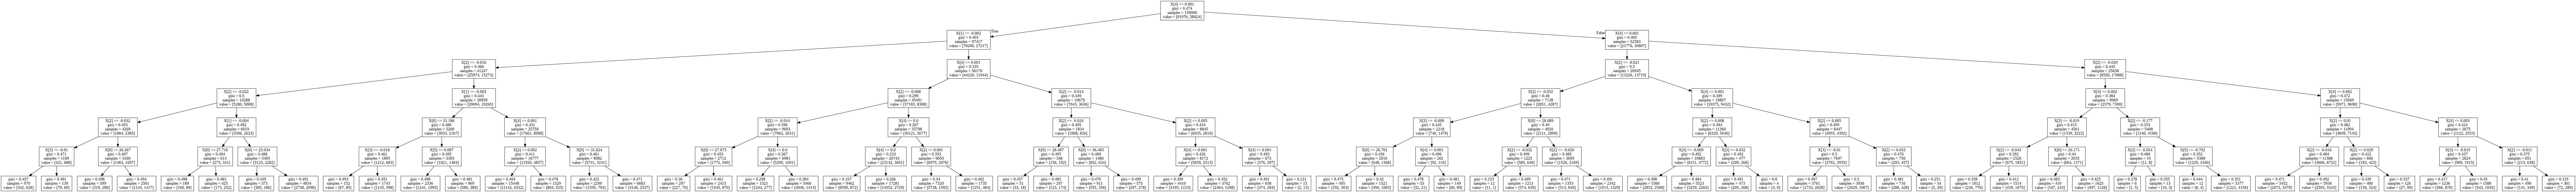

In [35]:
import graphviz 
import pydotplus
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png("DT.png")
from IPython.display import Image
from IPython.core.display import HTML 
PATH = "DT.png"
Image(filename = PATH)

In [36]:
result = rsi14_tree.predict(rsi14_test1.values.reshape(-1,1))
count = 0
for i in range(len(result)):
  if(result[i] == rsi14_test1_labels[i+150000]):
    count = count + 1
print(count/len(result))

0.6583


In [37]:
result = clf.predict(test2)
count = 0
for i in range(len(result)):
  if(result[i] == test2_labels[i+180000]):
    count = count + 1
print(count/len(result))

0.6929


In [38]:
result = clf.predict(test3)
count = 0
for i in range(len(result)):
  if(result[i] == test3_labels[i+210000]):
    count = count + 1
print(count/len(result))

0.7032978308604733


# KNN


In [39]:
train = "/content/gdrive/My Drive/Datasets/train.csv"
data = pd.read_csv(train)
# Import and subset starter features
data['is_profit'] = data['is_profit'].astype('int')
#starterFeatures = data[['rsi14','sma9_var', 'sma180_var', 'vwap_var']]
y = data['is_profit']
data.drop(['is_profit', 'sym','datetime'], axis=1, inplace=True)
#starterFeatures.values # Now np array

In [40]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

X_train, X_holdout, y_train, y_holdout = train_test_split(data.values, y, test_size=0.3,
random_state=17)

# tree = DecisionTreeClassifier(random_state=17)
knn = KNeighborsClassifier(n_neighbors=5)

# tree.fit(X_train, y_train)

# for kNN, we need to scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_holdout_scaled = scaler.transform(X_holdout)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [41]:
d  = [[0, 0], [0, 0], [1, 1], [1, 1]]
d_scaled = scaler.fit_transform(d)
d_scaled

array([[-1., -1.],
       [-1., -1.],
       [ 1.,  1.],
       [ 1.,  1.]])

In [42]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


#tree_pred = tree.predict(X_holdout)
#print (f" Accuracy for decision tree is {accuracy_score(y_holdout, tree_pred)}") 

knn_pred = knn.predict(X_holdout_scaled)
print (f" Accuracy for k-nn is {accuracy_score(y_holdout, knn_pred)}")

 Accuracy for k-nn is 0.6631366031512903


Initial clustering of 4 features, elbow plot for k determination, scatter plot of point distribution, clustering img. 

# K-Means

In [43]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [44]:
train = "/content/gdrive/My Drive/Datasets/train.csv"
data = pd.read_csv(train)

In [45]:
# Import and subset starter features
starterFeatures = data[['rsi14','sma9_var', 'sma180_var', 'vwap_var']]
starterFeatures.values # Now np array

array([[ 3.05097608e+01, -6.22295056e-03, -2.26789532e-02,
        -1.75263798e-02],
       [ 4.64527415e+01, -1.06159541e-03, -4.72095039e-03,
        -7.71311385e-03],
       [ 3.43362238e+01, -4.44335091e-03, -1.66481693e-02,
        -1.65887992e-02],
       ...,
       [ 4.15506365e+01, -1.99079526e-03, -1.47744623e-02,
        -3.80272760e-03],
       [ 3.54330613e+01, -5.42660160e-03, -1.26001612e-02,
        -1.57668748e-02],
       [ 3.76485639e+01, -4.00720367e-03, -1.61337123e-02,
        -1.65276248e-02]])

In [46]:
# Normalize starter features
min_max_scaler = preprocessing.MinMaxScaler()
startersScaled = min_max_scaler.fit_transform(starterFeatures)
subset = pd.DataFrame(startersScaled, columns=['rsi14','sma9_var', 'sma180_var', 'vwap_var'])
print(subset.head())


      rsi14  sma9_var  sma180_var  vwap_var
0  0.371055  0.613722    0.460930  0.549934
1  0.613812  0.843916    0.507860  0.599319
2  0.429319  0.693091    0.476690  0.554652
3  0.463555  0.846391    0.535086  0.616602
4  0.349795  0.848878    0.527060  0.629240


In [47]:
# Determine est for number of clusters in data
numClusters = [1,2,3,4,5,6,7,8]
sse = []
for k in numClusters:
    test_Kmeans = cluster.KMeans(n_clusters=k)
    test_Kmeans.fit(subset)
    sse.append(test_Kmeans.inertia_)

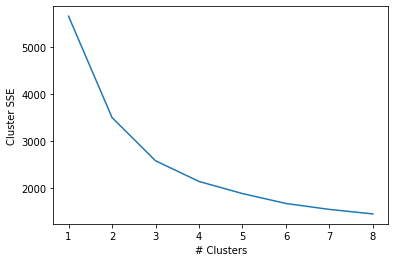

In [48]:
# Plot elbow plt
plt.plot(numClusters,sse)
plt.xlabel("# Clusters")
plt.ylabel("Cluster SSE")
plt.show()

In [61]:
# kmeans cluster
kmeans = cluster.KMeans(n_clusters=2, max_iter=50, random_state=1)
kmeans.fit(subset)
labels = kmeans.labels_
post_clusterDF = pd.DataFrame(labels, index=subset.index, columns=['Cluster ID'])
print(post_clusterDF)


        Cluster ID
0                0
1                1
2                0
3                1
4                1
...            ...
258724           1
258725           1
258726           1
258727           0
258728           1

[258729 rows x 1 columns]


In [62]:
centroids = kmeans.cluster_centers_
pd.DataFrame(centroids,columns=subset.columns)

,rsi14,sma9_var,sma180_var,vwap_var
0,0.367573,0.605378,0.446856,0.537018
1,0.447582,0.810526,0.499024,0.601920


[[0.37105512 0.61372174 0.46092968 0.54993419]
 [0.6138121  0.84391645 0.5078605  0.59931859]
 [0.42931905 0.69309129 0.47669032 0.55465248]
 ...
 [0.53916983 0.80247445 0.481587   0.61899727]
 [0.44602012 0.64923864 0.48726924 0.55878874]
 [0.47975464 0.71254331 0.47803478 0.55496033]]


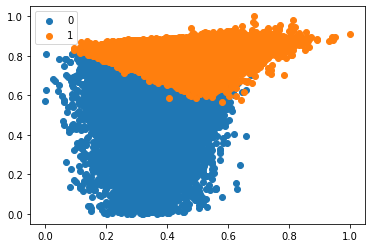

In [63]:
# Plot clusters with transformed data
print(startersScaled)
#Getting unique labels
u_labels = np.unique(labels)
 
#plotting the results:
for i in u_labels:
    plt.scatter(startersScaled[labels == i , 0] , startersScaled[labels == i , 1] , label = i)
plt.legend()
plt.show()

# Single-Link

In [52]:
from scipy.cluster import hierarchy
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [53]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [57]:
# Import
train = '/content/gdrive/My Drive/Datasets/train.csv'
data = pd.read_csv(train)

In [58]:
# Import and subset starter features
starterFeatures = data[['rsi14','sma9_var', 'sma180_var', 'vwap_var']]
starterFeatures.values # Now np array

array([[ 3.05097608e+01, -6.22295056e-03, -2.26789532e-02,
        -1.75263798e-02],
       [ 4.64527415e+01, -1.06159541e-03, -4.72095039e-03,
        -7.71311385e-03],
       [ 3.43362238e+01, -4.44335091e-03, -1.66481693e-02,
        -1.65887992e-02],
       ...,
       [ 4.15506365e+01, -1.99079526e-03, -1.47744623e-02,
        -3.80272760e-03],
       [ 3.54330613e+01, -5.42660160e-03, -1.26001612e-02,
        -1.57668748e-02],
       [ 3.76485639e+01, -4.00720367e-03, -1.61337123e-02,
        -1.65276248e-02]])

In [59]:
# Normalize starter features
min_max_scaler = preprocessing.MinMaxScaler()
startersScaled = min_max_scaler.fit_transform(starterFeatures)
subset = pd.DataFrame(startersScaled, columns=['rsi14','sma9_var', 'sma180_var', 'vwap_var'])
print(subset.head())

      rsi14  sma9_var  sma180_var  vwap_var
0  0.371055  0.613722    0.460930  0.549934
1  0.613812  0.843916    0.507860  0.599319
2  0.429319  0.693091    0.476690  0.554652
3  0.463555  0.846391    0.535086  0.616602
4  0.349795  0.848878    0.527060  0.629240


[[7.00000000e+00 9.00000000e+00 1.71773658e-02 2.00000000e+00]
 [6.00000000e+00 2.90000000e+01 1.74547272e-02 2.00000000e+00]
 [1.20000000e+01 4.50000000e+01 1.74670502e-02 2.00000000e+00]
 [1.00000000e+00 3.20000000e+01 1.80152621e-02 2.00000000e+00]
 [1.40000000e+01 4.80000000e+01 1.87115598e-02 2.00000000e+00]
 [2.80000000e+01 5.30000000e+01 2.11652460e-02 3.00000000e+00]
 [2.00000000e+01 2.60000000e+01 2.27610288e-02 2.00000000e+00]
 [4.00000000e+00 3.30000000e+01 2.30395552e-02 2.00000000e+00]
 [2.20000000e+01 3.80000000e+01 2.32535439e-02 2.00000000e+00]
 [8.00000000e+00 2.10000000e+01 2.45483494e-02 2.00000000e+00]
 [5.10000000e+01 6.00000000e+01 2.57480574e-02 4.00000000e+00]
 [1.80000000e+01 5.70000000e+01 2.63245893e-02 3.00000000e+00]
 [4.40000000e+01 6.10000000e+01 2.94081025e-02 5.00000000e+00]
 [4.60000000e+01 5.90000000e+01 2.94098724e-02 3.00000000e+00]
 [1.50000000e+01 5.80000000e+01 3.00127413e-02 3.00000000e+00]
 [4.70000000e+01 6.30000000e+01 3.22831026e-02 6.000000

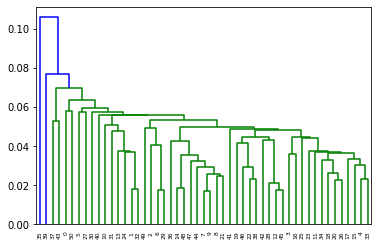

In [60]:
# Hierarchical single-link clustering
instanceList = subset[0:51].index
singleLink = hierarchy.linkage(subset[0:51].to_numpy(), 'single') # Dataset is too large
# runtime and memory issues if entire dataset is used. Will need to look for solution
# single-link does not seem to be the answer
print(singleLink)
slDN = hierarchy.dendrogram(singleLink,labels=instanceList.tolist())